### This jupyter notebook is created for the purpose of inventing machine learning model which can predict whether the customer of airline company satisfied or discontented with the services.

### ***Author : Umidjon Sattorov student at Mohirdev platform and machine learning engineer.***

In [172]:
#Importing all necessary libraries and modules
#Data processing
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing and feature engineering
from sklearn.model_selection import train_test_split

#Modelling
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier, VotingClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

#Metrics
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report

#Saving machine learning model into pickle format
import dill

Structure of the dataset available : 

1) id - unique identifier column(as index)
2) Gender - gender of airline service customer
3) Customer Type - the type of the customer of airline company(Whether the customer is loyal or disloyal)
4) Age - age of the customer
5) Type of Travel - the purpose of of the travel
6) Flight Distance - distance of the flight in miles
7) Inflight wifi service - satisfaction of the customer from wifi system of ailine company(1 - 5)
8) Departure/Arrival time convenient - satisfaction level of customer from departure and arrival time
9) Ease of Online booking - satisfaction level of customer from online booking system of airline company
10) Gate location - satisfaction of the customer from gate location
11) Food and drink - satisfaction of the customer from culinary service
12) Online boarding -satisfaction of the customer from online boarding
13) Seat comfort - the satisfaction of the customer from the quality of the seating
14) Inflight entertainment - satisfaction of the customer from inflight entertainment system
15) On-Board service  - satisfaction of the customer from on-board service quality 
16) Leg room service - satisfaction of the customer from the leg room service quality
17) Baggage handling - the satisfaction of the customer from baggage handling service
18) Checkin service - the satisfaction of the customer from checkin service
19) Inflight service - the satisfaction of the customer from inflight service quality
20) Cleanliness - the satisfaction rate of the customer from cleanliness of airline company
21) Departure delay in Minutes - time delayed before departure
22) Arrival delay in Minutes - time delayed before arrival

23) ***satisfaction*** - satisfaction of the customer from the airline service(target column)(1 - satisfied, 0 - distisfied)

In [93]:
#Reading dataset from csf formats
df = pd.read_csv(filepath_or_buffer = './data/final2_ohe_hot_encoded_train.csv', sep = ',', index_col = 'Unnamed: 0')
df.head()

,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Ease of Online booking,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,satisfaction,Class_Business,Class_Eco,Class_Eco Plus
0,0,-0.427939,1,-0.644234,-0.572550,-0.561397,0.589206,-0.997330,0.387902,0.448356,-0.356237,-1.845879,-0.568385,0.508106,-0.578779,0.525416,0,0.0,1.0,0.0
1,1,0.646087,1,0.197063,0.895150,0.845966,-0.160897,1.220437,0.387902,1.199245,1.212744,1.210591,1.112730,-0.286555,1.123263,-0.237272,1,1.0,0.0,0.0
2,1,0.243327,1,-0.354672,-1.306399,0.845966,0.589206,0.481182,-0.374784,-1.804311,-1.925218,-1.845879,-2.249501,-1.875876,-2.280821,-0.999961,0,0.0,1.0,0.0
3,1,-0.830699,1,0.313475,0.161300,0.142285,-0.911000,-0.997330,-1.137471,-1.053422,0.428253,0.446474,1.112730,1.302767,0.272242,-0.999961,1,1.0,0.0,0.0
4,1,-1.904725,0,-0.688256,0.161300,0.142285,0.589206,-0.258074,0.387902,0.448356,1.212744,-1.081761,1.112730,-0.286555,1.123263,0.525416,0,0.0,1.0,0.0


### **Modellling**

### Using Random Forest Classifier

In [94]:
# Dividing dataset into training and test sets
x = df.drop(columns = 'satisfaction')
y = df['satisfaction']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [113]:
#Random Forest Classifier
#Training Random Forest Classifier with default parameters
model = RandomForestClassifier(n_estimators = 20, random_state = 1, min_samples_split = 2, min_samples_leaf = 20, max_depth = 4)
model.fit(X = x_train, y = y_train)

print(f"The Roc auc score of Random Forest algorithm with optimal parameters is(Train dataset) {roc_auc_score(y_train, model.predict_proba(x_train)[:, 1])}")
print(f"The Roc auc score of Random Forest algorithm with optimal parameters is(Test dataset) {roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])}")

The Roc auc score of Random Forest algorithm with optimal parameters is(Train dataset) 0.9635075533768883
The Roc auc score of Random Forest algorithm with optimal parameters is(Test dataset) 0.9658573634294537


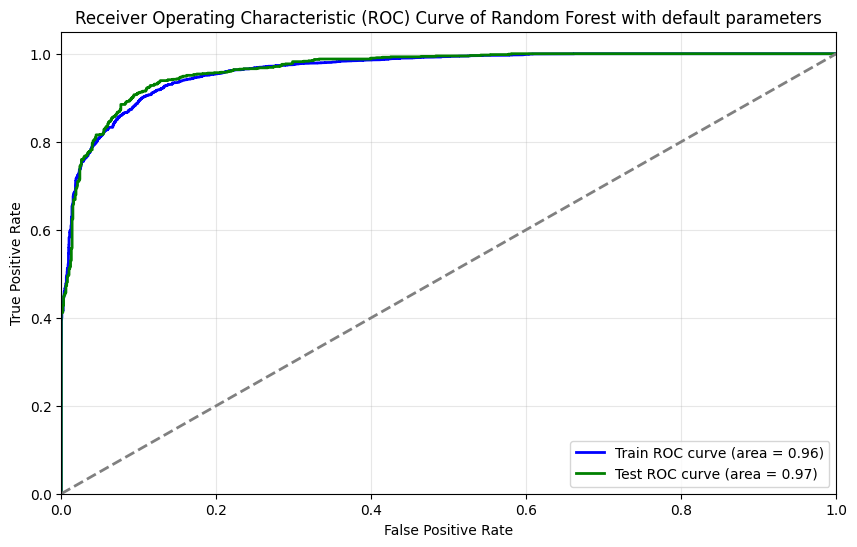

In [112]:
#Drawing roc_auc line for seeing the models performance
fpr_train, tpr_train, _ = roc_curve(y_train, model.predict_proba(x_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, model.predict_proba(x_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {roc_auc_score(y_train, model.predict_proba(x_train)[:, 1]):.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {roc_auc_score(y_test, model.predict_proba(x_test)[:, 1]):.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Random Forest with default parameters')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

Well Random Forest doesn't perform well on the dataset and problem. We might increase roc_auc score of our classifier model, but it cannot reach the score more than 0.9. It is my point of view. However the overall score of the Random Forest Classifier is not such bad, we can use other tree based algorithms like gradient boosting algorithms. One popular algorithm is Catboost Classifier which is developed by Yandex company. I am going to test model in my problem.

In [117]:
#Seeing the confusion matrix for given dataset
print("Confusion matrix and classification report of Random Forests algorithm : ")
test_pred_labels = model.predict(x_test)

conf_matrix = confusion_matrix(y_test, test_pred_labels)

print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, test_pred_labels)
print("Classification Report:")
print(class_report)

Confusion matrix and classification report of Random Forests algorithm : 
Confusion Matrix:
[[925  77]
 [115 883]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.92      0.91      1002
           1       0.92      0.88      0.90       998

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000



The Roc auc score of Random Forest algorithm with optimal parameters is(Train dataset) 0.893755848438962
The Roc auc score of Random Forest algorithm with optimal parameters is(Test dataset) 0.9039616158464634


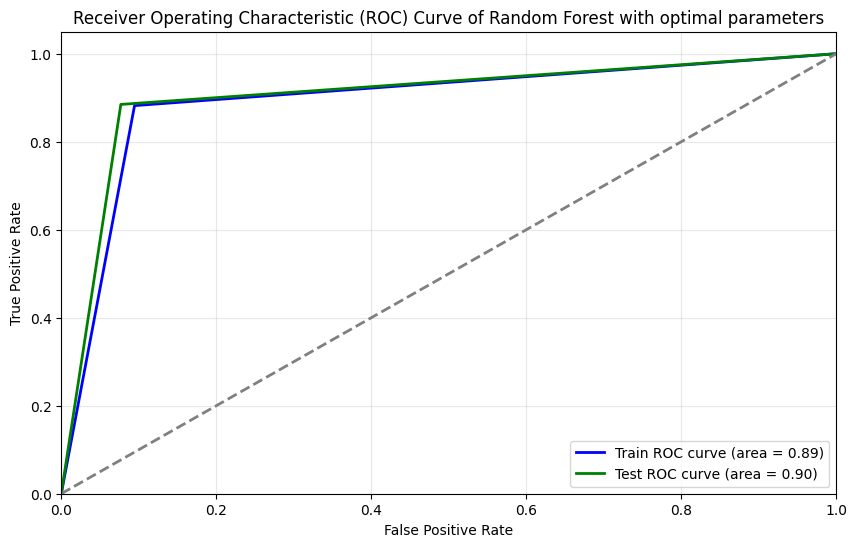

In [115]:
#Calculating roc_auc score with actual predictions(not probabilities)
print(f"The Roc auc score of Random Forest algorithm with optimal parameters is(Train dataset) {roc_auc_score(y_train, model.predict(x_train))}")
print(f"The Roc auc score of Random Forest algorithm with optimal parameters is(Test dataset) {roc_auc_score(y_test, model.predict(x_test))}")

#Drawing roc_auc line for seeing the models performance
fpr_train, tpr_train, _ = roc_curve(y_train, model.predict(x_train))
fpr_test, tpr_test, _ = roc_curve(y_test, model.predict(x_test))

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {roc_auc_score(y_train, model.predict(x_train)):.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {roc_auc_score(y_test, model.predict(x_test)):.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Random Forest with optimal parameters')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

### CatBoostClassifier

In [97]:
#CatBoostClassifier
train_pool = Pool(data = x_train, label = y_train)
test_pool = Pool(data = x_test, label = y_test)

cat_model = CatBoostClassifier(
       iterations = 1500,
       learning_rate = 0.01,
       depth = 10,
       eval_metric = 'AUC',
       random_seed = 1,
)

cat_model.fit(train_pool, eval_set = test_pool, early_stopping_rounds = 100)

#Evaluation of the model
train_predictions = cat_model.predict_proba(train_pool)[:, 1]
test_predictions = cat_model.predict_proba(test_pool)[:, 1]

train_auc_cat = roc_auc_score(y_train, train_predictions)
test_auc_cat = roc_auc_score(y_test, test_predictions)

print(f"The ROC AUC score of CatBoostClassifier (Train dataset): {train_auc_cat}")
print(f"The ROC AUC score of CatBoostClassifier (Test dataset): {test_auc_cat}")

0:	test: 0.9762529	best: 0.9762529 (0)	total: 13.6ms	remaining: 20.4s
1:	test: 0.9827509	best: 0.9827509 (1)	total: 24ms	remaining: 18s
2:	test: 0.9849064	best: 0.9849064 (2)	total: 34.3ms	remaining: 17.1s
3:	test: 0.9860739	best: 0.9860739 (3)	total: 44.3ms	remaining: 16.6s
4:	test: 0.9858994	best: 0.9860739 (3)	total: 55.7ms	remaining: 16.7s
5:	test: 0.9858764	best: 0.9860739 (3)	total: 65.6ms	remaining: 16.3s
6:	test: 0.9863699	best: 0.9863699 (6)	total: 76.4ms	remaining: 16.3s
7:	test: 0.9864679	best: 0.9864679 (7)	total: 86.5ms	remaining: 16.1s
8:	test: 0.9865534	best: 0.9865534 (8)	total: 96ms	remaining: 15.9s
9:	test: 0.9865424	best: 0.9865534 (8)	total: 106ms	remaining: 15.8s
10:	test: 0.9865234	best: 0.9865534 (8)	total: 116ms	remaining: 15.7s
11:	test: 0.9865799	best: 0.9865799 (11)	total: 126ms	remaining: 15.6s
12:	test: 0.9864894	best: 0.9865799 (11)	total: 137ms	remaining: 15.6s
13:	test: 0.9866069	best: 0.9866069 (13)	total: 146ms	remaining: 15.5s
14:	test: 0.9867129	best

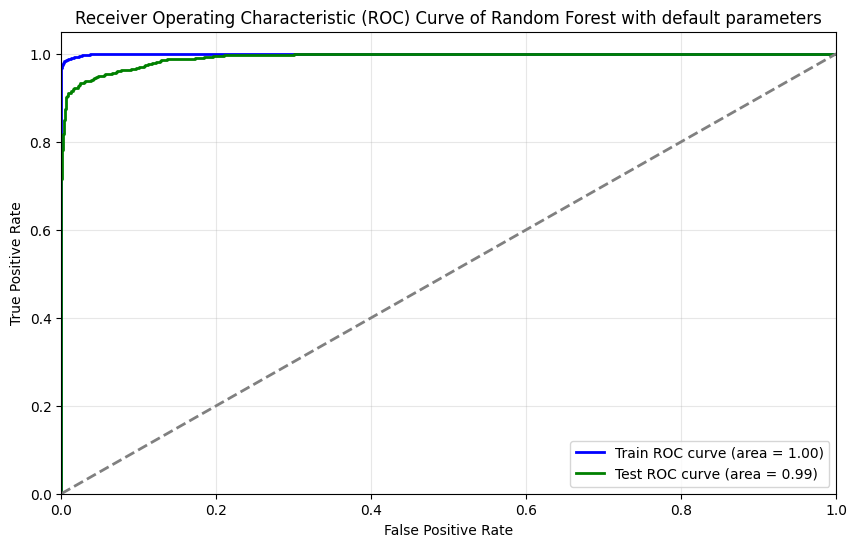

In [98]:
#Drawing roc_auc line for seeing the models performance
fpr_train, tpr_train, _ = roc_curve(y_train, cat_model.predict_proba(x_train)[:, 1])
fpr_test, tpr_test, _ = roc_curve(y_test, cat_model.predict_proba(x_test)[:, 1])

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {roc_auc_score(y_train, cat_model.predict_proba(x_train)[:, 1]):.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {roc_auc_score(y_test, cat_model.predict_proba(x_test)[:, 1]):.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of CatBoost Classifier algorithm')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

Wow this model is like magician, it will find everything exceptionally correct :)

In [99]:
#Seeing the confusion matrix for given dataset
test_pred_labels = cat_model.predict(test_pool)

conf_matrix = confusion_matrix(y_test, test_pred_labels)

print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, test_pred_labels)
print("Classification Report:")
print(class_report)

Confusion Matrix:
[[975  27]
 [ 67 931]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.95      1002
           1       0.97      0.93      0.95       998

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



The ROC AUC score of CatBoostClassifier (Train dataset): 0.9895019973754994
The ROC AUC score of CatBoostClassifier (Test dataset): 0.9529598118392473


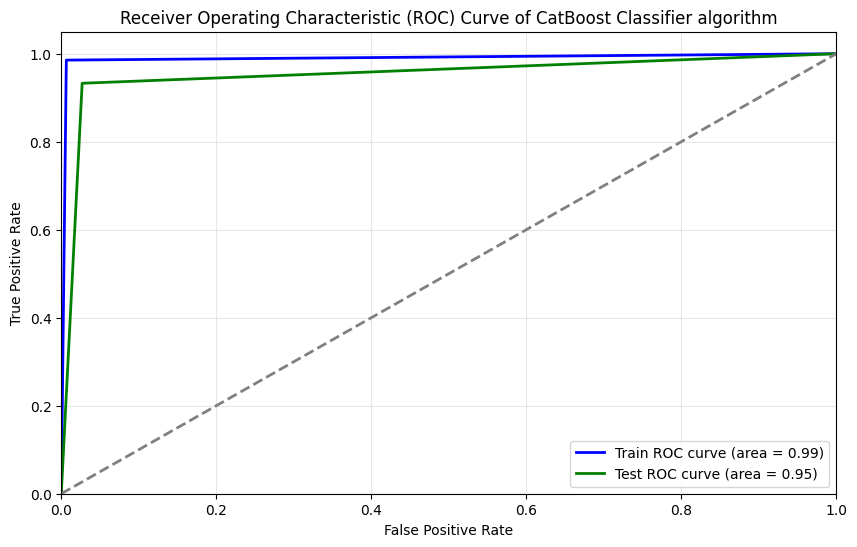

In [120]:
#Calculating roc_auc score with real predictions(not with probabilities)
#Evaluation of the model
train_predictions = cat_model.predict(train_pool)
test_predictions = cat_model.predict(test_pool)

train_auc_cat = roc_auc_score(y_train, train_predictions)
test_auc_cat = roc_auc_score(y_test, test_predictions)

print(f"The ROC AUC score of CatBoostClassifier (Train dataset): {train_auc_cat}")
print(f"The ROC AUC score of CatBoostClassifier (Test dataset): {test_auc_cat}")

#Drawing roc_auc line for seeing the models performance
fpr_train, tpr_train, _ = roc_curve(y_train, cat_model.predict(train_pool))
fpr_test, tpr_test, _ = roc_curve(y_test, cat_model.predict(test_pool))

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {roc_auc_score(y_train, cat_model.predict(train_pool)):.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {roc_auc_score(y_test, cat_model.predict(test_pool)):.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of CatBoost Classifier algorithm')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

### MLP Classifier algorithm

The ROC AUC score of MLP (Train dataset): 0.9965223741305935
The ROC AUC score of MLP (Test dataset): 0.9891479565918264


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


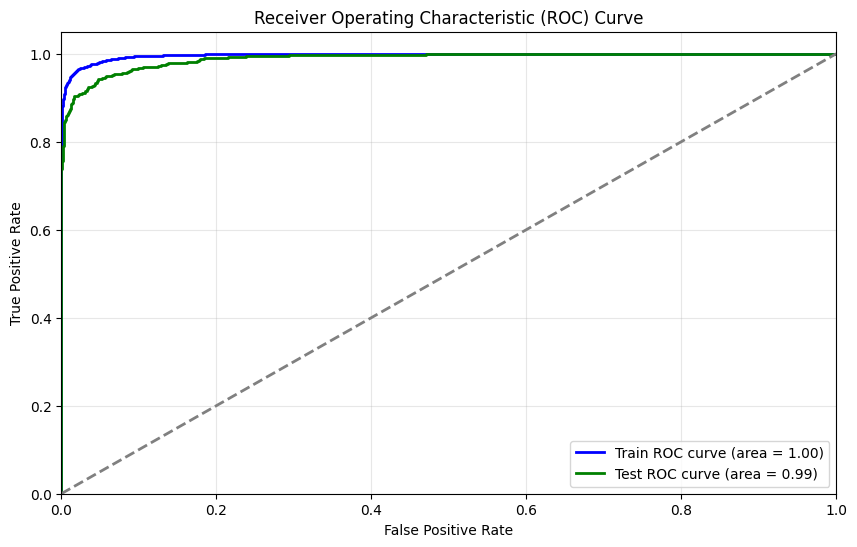

In [128]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes = (1000),
    activation = 'relu',
    solver = 'adam',
    learning_rate_init = 0.0001,
    max_iter = 400,
    random_state = 1
)

mlp.fit(x_train, y_train)

train_predictions = mlp.predict_proba(x_train)[:, 1]
test_predictions = mlp.predict_proba(x_test)[:, 1]

train_auc_mlp = roc_auc_score(y_train, train_predictions)
test_auc_mlp = roc_auc_score(y_test, test_predictions)

print(f"The ROC AUC score of MLP (Train dataset): {train_auc_mlp}")
print(f"The ROC AUC score of MLP (Test dataset): {test_auc_mlp}")

fpr_train, tpr_train, _ = roc_curve(y_train, train_predictions)
fpr_test, tpr_test, _ = roc_curve(y_test, test_predictions)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {train_auc_mlp:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {test_auc_mlp:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


Model is not overtrained and performed exceptionally outstanding in terms of solving the problem of prediction of satisfaction of the customer from airline service.

In [129]:
#Seeing the confusion matrix for given dataset
print('Confusion matrix and classification report of Multilayer perceptron : ')
test_pred_labels = mlp.predict(x_test)

conf_matrix = confusion_matrix(y_test, test_pred_labels)

print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, test_pred_labels)
print("Classification Report:")
print(class_report)

Confusion matrix and classification report of Multilayer perceptron : 
Confusion Matrix:
[[956  46]
 [ 62 936]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95      1002
           1       0.95      0.94      0.95       998

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



The ROC AUC score ofMultilayer Perceptron (Train dataset): 0.9696258049064511
The ROC AUC score of Multilayer Perceptron (Test dataset): 0.9459837839351358


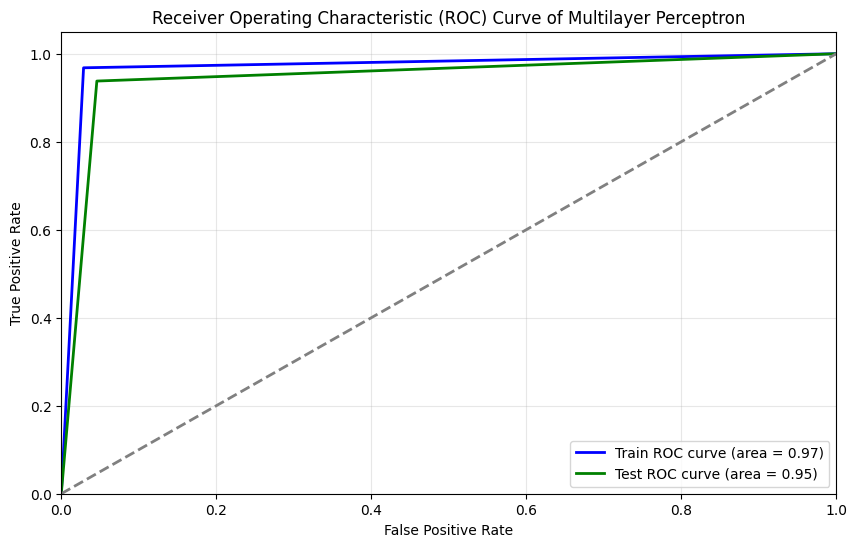

In [131]:
#Calculating roc_auc score with real predictions(not with probabilities)
#Evaluation of the model
train_predictions = mlp.predict(X = x_train)
test_predictions = mlp.predict(X = x_test)

train_auc_mlp = roc_auc_score(y_train, train_predictions)
test_auc_mlp = roc_auc_score(y_test, test_predictions)

print(f"The ROC AUC score ofMultilayer Perceptron (Train dataset): {train_auc_mlp}")
print(f"The ROC AUC score of Multilayer Perceptron (Test dataset): {test_auc_mlp}")

#Drawing roc_auc line for seeing the models performance
fpr_train, tpr_train, _ = roc_curve(y_train, mlp.predict(x_train))
fpr_test, tpr_test, _ = roc_curve(y_test, mlp.predict(x_test))

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {roc_auc_score(y_train, mlp.predict(x_train)):.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {roc_auc_score(y_test, mlp.predict(x_test)):.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Multilayer Perceptron')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

### Using logisic regression for binary classification task

The ROC AUC score of Logistic Regression (Train dataset): 0.9288287322071831
The ROC AUC score of Logistic Regression (Test dataset): 0.9285077140308562


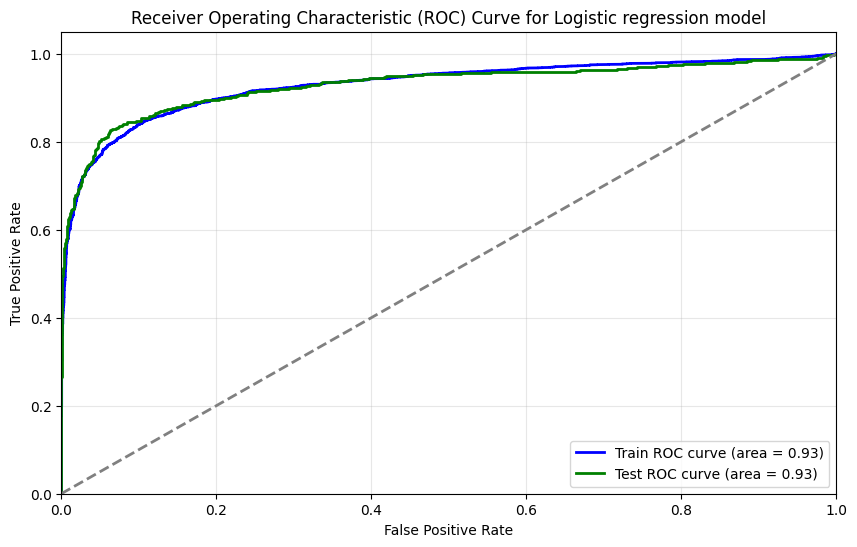

In [133]:
#Logistic regression
log_reg = LogisticRegression(max_iter = 100, C = 1, solver = 'liblinear', penalty = 'l1', tol = 0.001, random_state = 1)
log_reg.fit(x_train, y_train)


train_predictions = log_reg.predict_proba(x_train)[:, 1]
test_predictions = log_reg.predict_proba(x_test)[:, 1]

train_auc_log = roc_auc_score(y_train, train_predictions)
test_auc_log = roc_auc_score(y_test, test_predictions)

print(f"The ROC AUC score of Logistic Regression (Train dataset): {train_auc_log}")
print(f"The ROC AUC score of Logistic Regression (Test dataset): {test_auc_log}")

fpr_train, tpr_train, _ = roc_curve(y_train, train_predictions)

fpr_test, tpr_test, _ = roc_curve(y_test, test_predictions)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw = 2, label = f'Train ROC curve (area = {train_auc_log:.2f})')
plt.plot(fpr_test, tpr_test, color = 'green', lw=2, label = f'Test ROC curve (area = {test_auc_log:.2f})')

plt.plot([0, 1], [0, 1], color = 'gray', lw = 2, linestyle = '--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic regression model')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

Even the logistic regression algorithms performed well in the prediction of satisfaction of customer from airline service. But it is not magnificient as other models we have tested. However, it is acceptable according to standarts

In [134]:
#Seeing the confusion matrix for given dataset
print('Confusion matrix and classification report of Logistic Regression algorithm: ')
test_pred_labels = log_reg.predict(x_test)

conf_matrix = confusion_matrix(y_test, test_pred_labels)

print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, test_pred_labels)
print("Classification Report:")
print(class_report)

Confusion matrix and classification report of Logistic Regression algorithm: 
Confusion Matrix:
[[899 103]
 [152 846]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1002
           1       0.89      0.85      0.87       998

    accuracy                           0.87      2000
   macro avg       0.87      0.87      0.87      2000
weighted avg       0.87      0.87      0.87      2000



The ROC AUC score ofMultilayer Perceptron (Train dataset): 0.8643770285942571
The ROC AUC score of Multilayer Perceptron (Test dataset): 0.8724504898019593


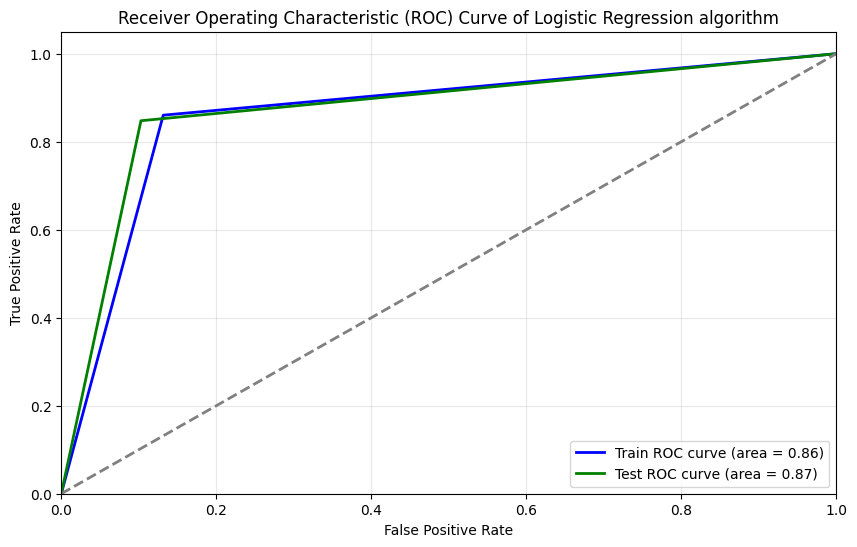

In [141]:
#Calculating roc_auc score with real predictions(not with probabilities)
#Evaluation of the model
train_predictions = log_reg.predict(X = x_train)
test_predictions = log_reg.predict(X = x_test)

train_auc_log = roc_auc_score(y_train, train_predictions)
test_auc_log = roc_auc_score(y_test, test_predictions)

print(f"The ROC AUC score ofMultilayer Perceptron (Train dataset): {train_auc_log}")
print(f"The ROC AUC score of Multilayer Perceptron (Test dataset): {test_auc_log}")

#Drawing roc_auc line for seeing the models performance
fpr_train, tpr_train, _ = roc_curve(y_train, log_reg.predict(x_train))
fpr_test, tpr_test, _ = roc_curve(y_test, log_reg.predict(x_test))

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {roc_auc_score(y_train, log_reg.predict(x_train)):.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {roc_auc_score(y_test, log_reg.predict(x_test)):.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Logistic Regression algorithm')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

### Using support vector machine 

The ROC AUC score of SVM (Train dataset): 0.9286332009083003
The ROC AUC score of SVM (Test dataset): 0.9287117148468595


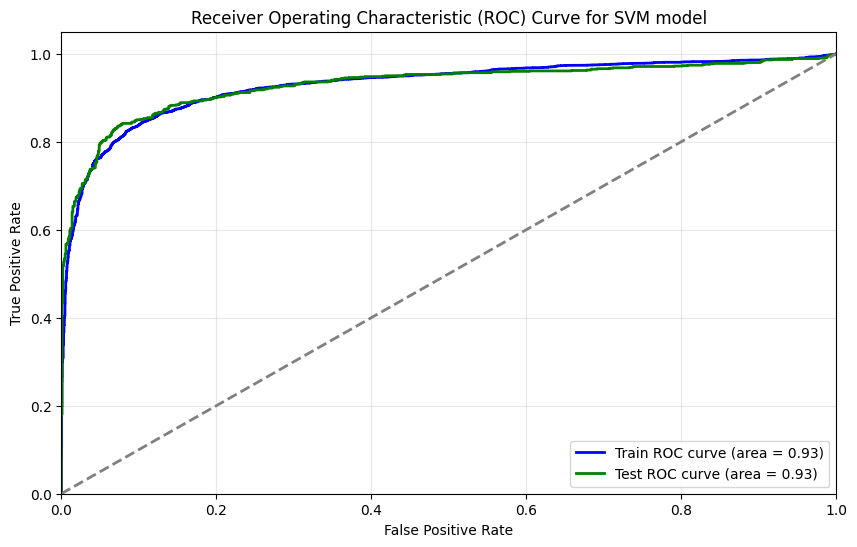

In [138]:
#Support vector machine algorithm
svm_model = SVC(probability = True, C = 0.1, kernel = 'linear', random_state = 1, degree = 10)
svm_model.fit(x_train, y_train)

train_predictions = svm_model.predict_proba(x_train)[:, 1]
test_predictions = svm_model.predict_proba(x_test)[:, 1]

train_auc_svm = roc_auc_score(y_train, train_predictions)
test_auc_svm = roc_auc_score(y_test, test_predictions)

print(f"The ROC AUC score of SVM (Train dataset): {train_auc_svm}")
print(f"The ROC AUC score of SVM (Test dataset): {test_auc_svm}")

fpr_train, tpr_train, _ = roc_curve(y_train, train_predictions)
fpr_test, tpr_test, _ = roc_curve(y_test, test_predictions)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {train_auc_svm:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {test_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM model')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


SVM worked like Logistic regression algorithm in terms of prediction of satisfaction of the customers from airline service.

In [139]:
#Seeing the confusion matrix for given dataset
print('Confusion matrix and classification report of Support Vector machine algorithm: ')
test_pred_labels = svm_model.predict(x_test)

conf_matrix = confusion_matrix(y_test, test_pred_labels)

print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, test_pred_labels)
print("Classification Report:")
print(class_report)

Confusion matrix and classification report of Support Vector machine algorithm: 
Confusion Matrix:
[[909  93]
 [155 843]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1002
           1       0.90      0.84      0.87       998

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000



The ROC AUC score of Support Vector Machine algorithm (Train dataset): 0.8682584670646167
The ROC AUC score of Support Vector Machine algorithm (Test dataset): 0.875937503750015


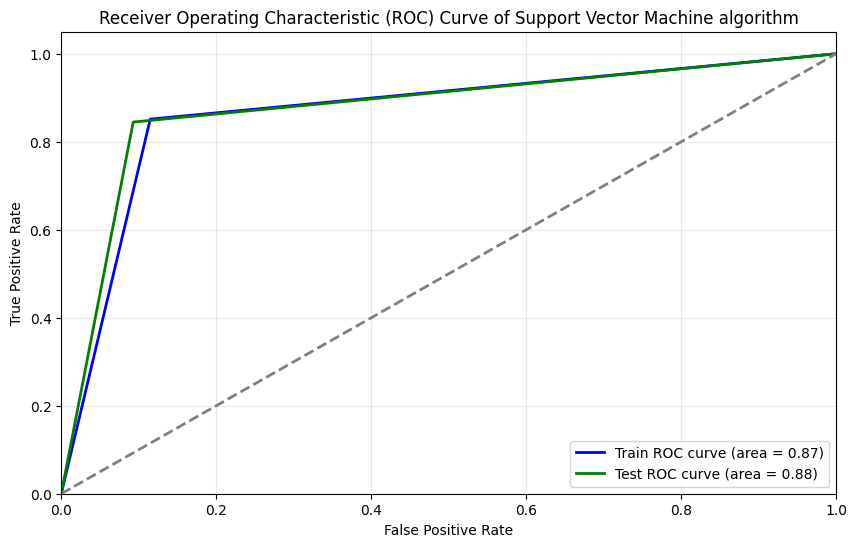

In [140]:
#Calculating roc_auc score with real predictions(not with probabilities)
#Evaluation of the model
train_predictions = svm_model.predict(X = x_train)
test_predictions = svm_model.predict(X = x_test)

train_auc_svm = roc_auc_score(y_train, train_predictions)
test_auc_svm = roc_auc_score(y_test, test_predictions)

print(f"The ROC AUC score of Support Vector Machine algorithm (Train dataset): {train_auc_svm}")
print(f"The ROC AUC score of Support Vector Machine algorithm (Test dataset): {test_auc_svm}")

#Drawing roc_auc line for seeing the models performance
fpr_train, tpr_train, _ = roc_curve(y_train, svm_model.predict(x_train))
fpr_test, tpr_test, _ = roc_curve(y_test, svm_model.predict(x_test))

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {roc_auc_score(y_train, svm_model.predict(x_train)):.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {roc_auc_score(y_test, svm_model.predict(x_test)):.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Support Vector Machine algorithm')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

### Using Decision Tree Model to this binary classification task

The ROC AUC score of Decision Tree (Train dataset): 0.9887586534396634
The ROC AUC score of Decision Tree (Test dataset): 0.9732658930635723


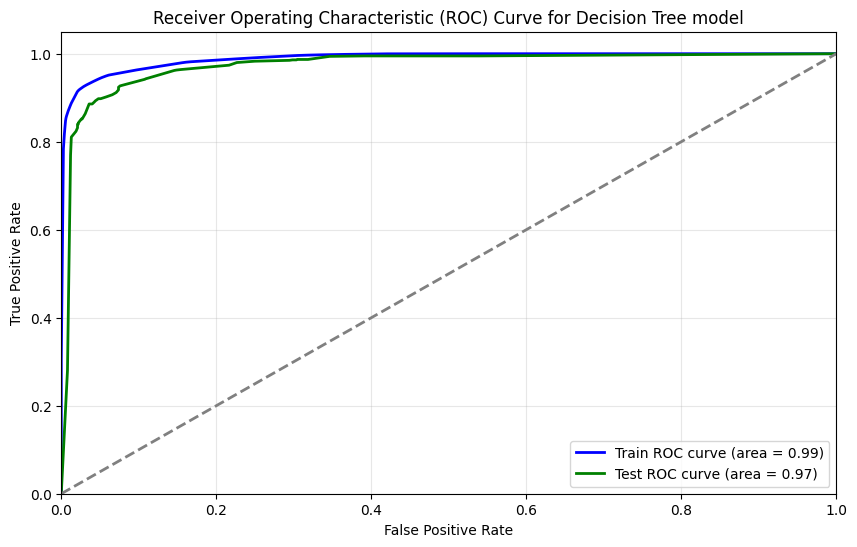

In [147]:
#Decision Tree Model 
decision_tree = DecisionTreeClassifier(max_depth = 8, min_samples_split = 6, random_state = 1)
decision_tree.fit(x_train, y_train)

train_predictions = decision_tree.predict_proba(x_train)[:, 1]
test_predictions = decision_tree.predict_proba(x_test)[:, 1]

train_auc_dt = roc_auc_score(y_train, train_predictions)
test_auc_dt = roc_auc_score(y_test, test_predictions)

print(f"The ROC AUC score of Decision Tree (Train dataset): {train_auc_dt}")
print(f"The ROC AUC score of Decision Tree (Test dataset): {test_auc_dt}")

fpr_train, tpr_train, _ = roc_curve(y_train, train_predictions)
fpr_test, tpr_test, _ = roc_curve(y_test, test_predictions)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {train_auc_dt:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {test_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Decision Tree model')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

Again as expecter, Decision Tree model showed similar result as Random Forests algorithm.

In [148]:
#Seeing the confusion matrix for given dataset
print('Confusion matrix and classification report of Decision Tree model: ')
test_pred_labels = decision_tree.predict(x_test)

conf_matrix = confusion_matrix(y_test, test_pred_labels)

print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, test_pred_labels)
print("Classification Report:")
print(class_report)

Confusion matrix and classification report of Decision Tree model: 
Confusion Matrix:
[[951  51]
 [102 896]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1002
           1       0.95      0.90      0.92       998

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



The ROC AUC score of Decision tree algorithm (Train dataset): 0.9482613620653405
The ROC AUC score of Decision tree algorithm (Test dataset): 0.9234486937947751


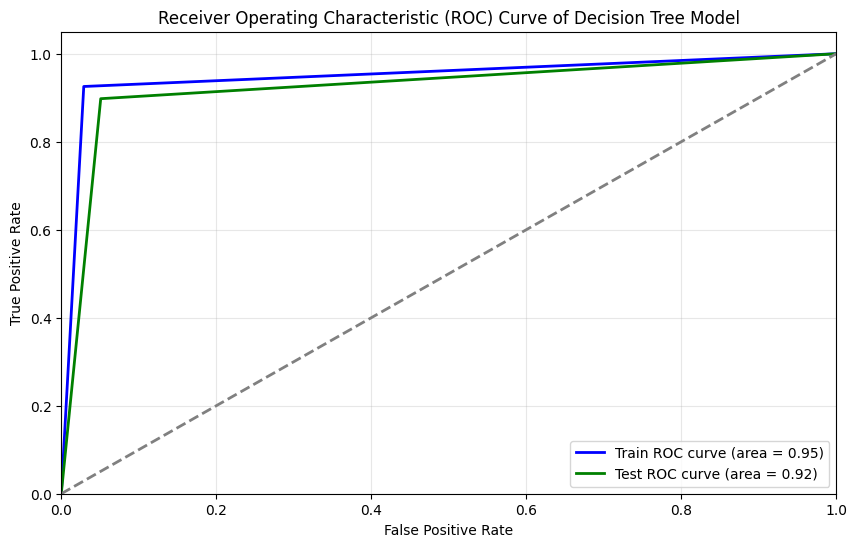

In [156]:
#Calculating roc_auc score with real predictions(not with probabilities)
#Evaluation of the model
train_predictions = decision_tree.predict(X = x_train)
test_predictions = decision_tree.predict(X = x_test)

train_auc_dc = roc_auc_score(y_train, train_predictions)
test_auc_dc = roc_auc_score(y_test, test_predictions)

print(f"The ROC AUC score of Decision tree algorithm (Train dataset): {train_auc_dc}")
print(f"The ROC AUC score of Decision tree algorithm (Test dataset): {test_auc_dc}")

#Drawing roc_auc line for seeing the models performance
fpr_train, tpr_train, _ = roc_curve(y_train, decision_tree.predict(x_train))
fpr_test, tpr_test, _ = roc_curve(y_test, decision_tree.predict(x_test))

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {roc_auc_score(y_train, decision_tree.predict(x_train)):.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {roc_auc_score(y_test, decision_tree.predict(x_test)):.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Decision Tree Model')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

### Using Adaboost classifier algorithm

The ROC AUC score of AdaBoost (Train dataset): 0.978653588413397
The ROC AUC score of AdaBoost (Test dataset): 0.979681918727675


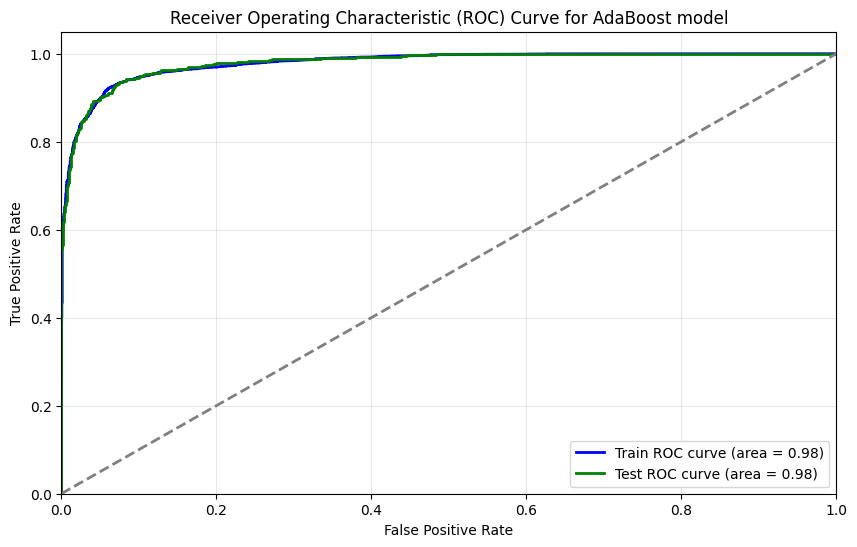

In [154]:
#AdaBoost classifier algorithm
adaboost = AdaBoostClassifier(n_estimators = 10000, learning_rate = 0.01, random_state = 1)
adaboost.fit(x_train, y_train)

train_predictions = adaboost.predict_proba(x_train)[:, 1]
test_predictions = adaboost.predict_proba(x_test)[:, 1]

train_auc_ab = roc_auc_score(y_train, train_predictions)
test_auc_ab = roc_auc_score(y_test, test_predictions)

print(f"The ROC AUC score of AdaBoost (Train dataset): {train_auc_ab}")
print(f"The ROC AUC score of AdaBoost (Test dataset): {test_auc_ab}")

fpr_train, tpr_train, _ = roc_curve(y_train, train_predictions)
fpr_test, tpr_test, _ = roc_curve(y_test, test_predictions)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {train_auc_ab:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {test_auc_ab:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for AdaBoost model')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()


AdaBoostClassifier algorithms showed great result, it is not overtrained. However, it couldn't exceeded the result of catboost algorithms.

In [155]:
#Seeing the confusion matrix for given dataset
print('Confusion matrix and classification report of AdaBoost algorithm: ')
test_pred_labels = adaboost.predict(x_test)

conf_matrix = confusion_matrix(y_test, test_pred_labels)

print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, test_pred_labels)
print("Classification Report:")
print(class_report)

Confusion matrix and classification report of AdaBoost algorithm: 
Confusion Matrix:
[[937  65]
 [ 88 910]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1002
           1       0.93      0.91      0.92       998

    accuracy                           0.92      2000
   macro avg       0.92      0.92      0.92      2000
weighted avg       0.92      0.92      0.92      2000



The ROC AUC score ofAdaBoost Classifier (Train dataset): 0.9295016073754019
The ROC AUC score of AdaBoost Classifier (Test dataset): 0.9234766939067756


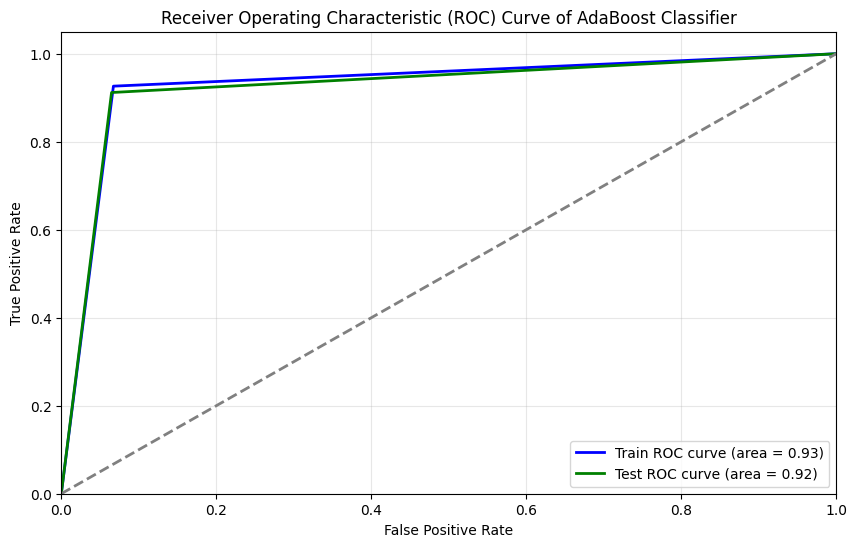

In [158]:
#Calculating roc_auc score with real predictions(not with probabilities)
#Evaluation of the model
train_predictions = adaboost.predict(X = x_train)
test_predictions = adaboost.predict(X = x_test)

train_auc_ada = roc_auc_score(y_train, train_predictions)
test_auc_ada = roc_auc_score(y_test, test_predictions)

print(f"The ROC AUC score ofAdaBoost Classifier (Train dataset): {train_auc_ada}")
print(f"The ROC AUC score of AdaBoost Classifier (Test dataset): {test_auc_ada}")

#Drawing roc_auc line for seeing the models performance
fpr_train, tpr_train, _ = roc_curve(y_train, adaboost.predict(x_train))
fpr_test, tpr_test, _ = roc_curve(y_test, adaboost.predict(x_test))

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {roc_auc_score(y_train, adaboost.predict(x_train)):.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {roc_auc_score(y_test, adaboost.predict(x_test)):.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of AdaBoost Classifier')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

### Using XGBoost Classifier

The ROC AUC score of XGBoost (Train dataset): 0.9767983691995924
The ROC AUC score of XGBoost (Test dataset): 0.9752724010896043


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [13:48:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


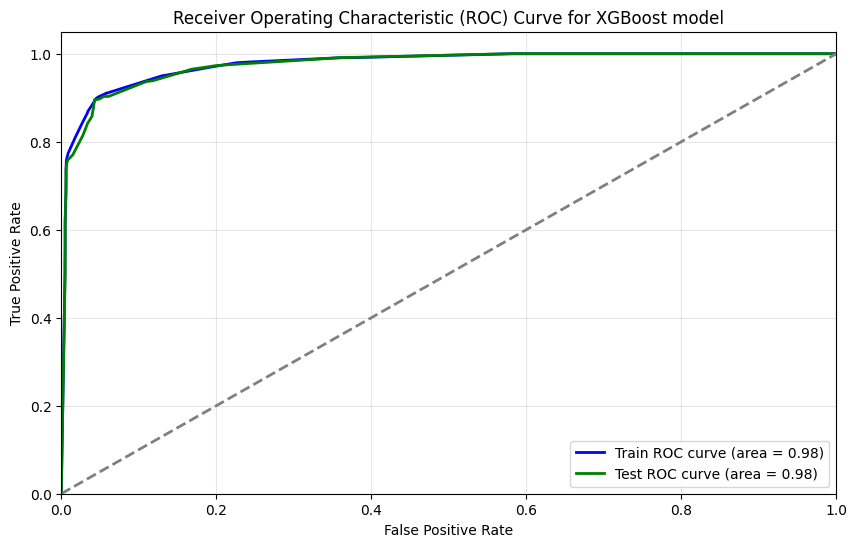

In [162]:
xgboost = XGBClassifier(n_estimators = 10, learning_rate = 0.001, random_state = 1, use_label_encoder = False, eval_metric = 'logloss')
xgboost.fit(x_train, y_train)

train_predictions = xgboost.predict_proba(x_train)[:, 1]
test_predictions = xgboost.predict_proba(x_test)[:, 1]

train_auc_xgb = roc_auc_score(y_train, train_predictions)
test_auc_xgb = roc_auc_score(y_test, test_predictions)

print(f"The ROC AUC score of XGBoost (Train dataset): {train_auc_xgb}")
print(f"The ROC AUC score of XGBoost (Test dataset): {test_auc_xgb}")

fpr_train, tpr_train, _ = roc_curve(y_train, train_predictions)
fpr_test, tpr_test, _ = roc_curve(y_test, test_predictions)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {train_auc_xgb:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {test_auc_xgb:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for XGBoost model')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

XGBoost classifier algorithm with given paremeters predicted whether the customer of the airline service contended with service provided or not and returned astonishing 0.97 roc_auc score. Model doesn't seem like overtrained because of difference between the metric scores in the train and test sets. Additionally, we can definately say that it is not biased which can be seen in the confusion matrix of the model. 

In [163]:
#Seeing the confusion matrix for given dataset
print('Consufion matrix and classification report of XGBoost classifier model : ')
test_pred_labels = xgboost.predict(x_test)

conf_matrix = confusion_matrix(y_test, test_pred_labels)

print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, test_pred_labels)
print("Classification Report:")
print(class_report)

Consufion matrix and classification report of XGBoost classifier model : 
Confusion Matrix:
[[953  49]
 [103 895]]
Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.95      0.93      1002
           1       0.95      0.90      0.92       998

    accuracy                           0.92      2000
   macro avg       0.93      0.92      0.92      2000
weighted avg       0.93      0.92      0.92      2000



The ROC AUC score of XGBoost classifier (Train dataset): 0.9267619816904954
The ROC AUC score of XGBoost classifier (Test dataset): 0.9239456957827832


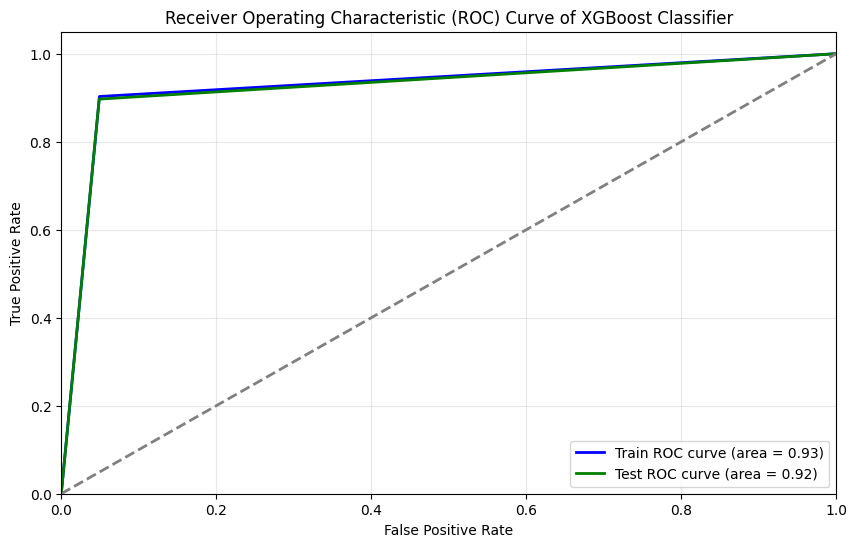

In [164]:
#Calculating roc_auc score with real predictions(not with probabilities)
#Evaluation of the model
train_predictions = xgboost.predict(X = x_train)
test_predictions = xgboost.predict(X = x_test)

train_auc_xgb = roc_auc_score(y_train, train_predictions)
test_auc_xgb = roc_auc_score(y_test, test_predictions)

print(f"The ROC AUC score of XGBoost classifier (Train dataset): {train_auc_xgb}")
print(f"The ROC AUC score of XGBoost classifier (Test dataset): {test_auc_xgb}")

#Drawing roc_auc line for seeing the models performance
fpr_train, tpr_train, _ = roc_curve(y_train, xgboost.predict(x_train))
fpr_test, tpr_test, _ = roc_curve(y_test, xgboost.predict(x_test))

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {roc_auc_score(y_train, xgboost.predict(x_train)):.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {roc_auc_score(y_test, xgboost.predict(x_test)):.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of XGBoost Classifier')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

### Using LightGBM classifier algorithm

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 4002, number of negative: 3998
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 414
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500250 -> initscore=0.001000
[LightGBM] [Info] Start training from score 0.001000
The ROC AUC score of LightGBM (Train dataset): 0.9761156502789127
The ROC AUC score of LightGBM (Test dataset): 0.9766354065416262


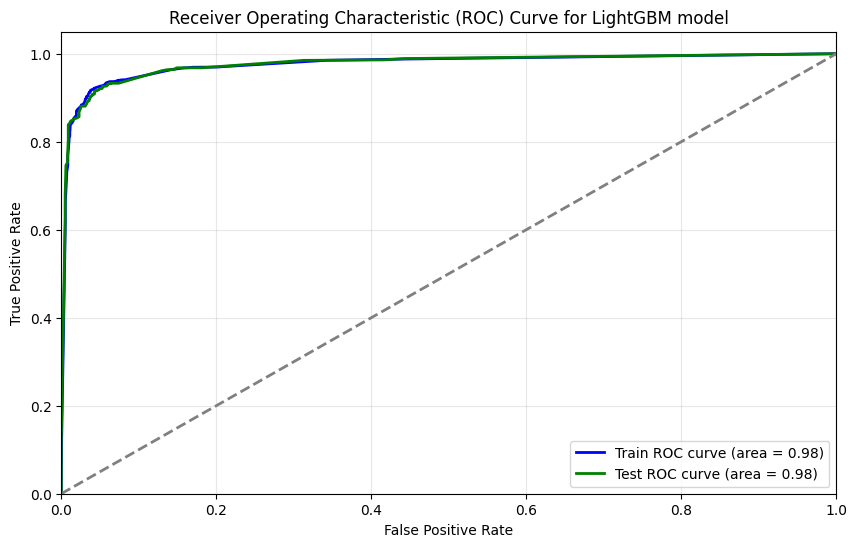

In [165]:
#LightGBM classifier algorithm
lgbm = LGBMClassifier(n_estimators = 4, random_state=1)
lgbm.fit(x_train, y_train)

train_predictions = lgbm.predict_proba(x_train)[:, 1]
test_predictions = lgbm.predict_proba(x_test)[:, 1]

# Calculate ROC AUC scores
train_auc_lgbm = roc_auc_score(y_train, train_predictions)
test_auc_lgbm = roc_auc_score(y_test, test_predictions)

# Print ROC AUC scores
print(f"The ROC AUC score of LightGBM (Train dataset): {train_auc_lgbm}")
print(f"The ROC AUC score of LightGBM (Test dataset): {test_auc_lgbm}")

# Calculate ROC curves
fpr_train, tpr_train, _ = roc_curve(y_train, train_predictions)
fpr_test, tpr_test, _ = roc_curve(y_test, test_predictions)

# Plot ROC curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {train_auc_lgbm:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {test_auc_lgbm:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for LightGBM model')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [166]:
#Seeing the confusion matrix for given dataset
print("Confusion matrix and classification report of the Light Boost classifier algorithm : ")
test_pred_labels = lgbm.predict(x_test)

conf_matrix = confusion_matrix(y_test, test_pred_labels)

print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, test_pred_labels)
print("Classification Report:")
print(class_report)

Confusion matrix and classification report of the Light Boost classifier algorithm : 
Confusion Matrix:
[[951  51]
 [ 79 919]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.94      1002
           1       0.95      0.92      0.93       998

    accuracy                           0.94      2000
   macro avg       0.94      0.93      0.93      2000
weighted avg       0.94      0.94      0.93      2000



The ROC AUC score of Light Gradient Boosting model classifier (Train dataset): 0.938381172095293
The ROC AUC score of Light Gradient Boosting model classifier (Test dataset): 0.9349717398869596


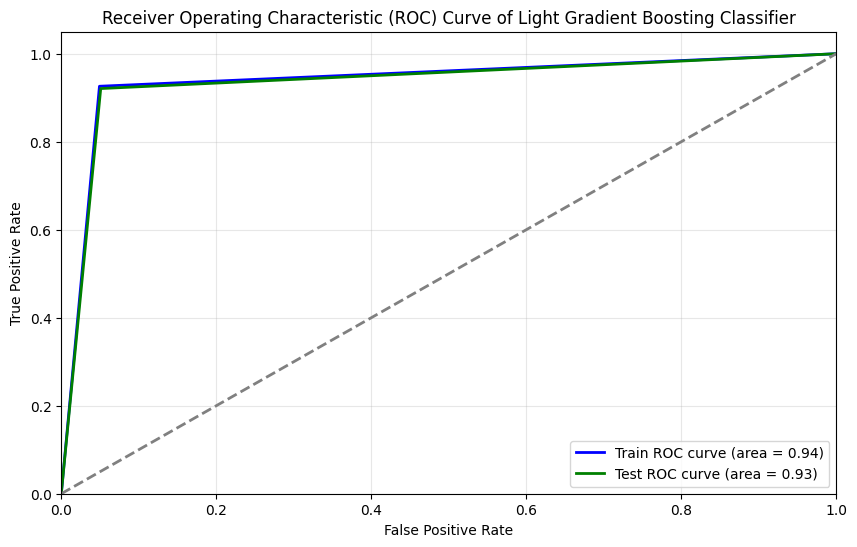

In [167]:
#Calculating roc_auc score with real predictions(not with probabilities)
#Evaluation of the model
train_predictions = lgbm.predict(X = x_train)
test_predictions = lgbm.predict(X = x_test)

train_auc_lgbm = roc_auc_score(y_train, train_predictions)
test_auc_lgbm = roc_auc_score(y_test, test_predictions)

print(f"The ROC AUC score of Light Gradient Boosting model classifier (Train dataset): {train_auc_lgbm}")
print(f"The ROC AUC score of Light Gradient Boosting model classifier (Test dataset): {test_auc_lgbm}")

#Drawing roc_auc line for seeing the models performance
fpr_train, tpr_train, _ = roc_curve(y_train, lgbm.predict(x_train))
fpr_test, tpr_test, _ = roc_curve(y_test, lgbm.predict(x_test))

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {roc_auc_score(y_train, lgbm.predict(x_train)):.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {roc_auc_score(y_test, lgbm.predict(x_test)):.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Light Gradient Boosting Classifier')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

### Using multiple models at the same time to see if there is any improvements in models performance

0:	total: 5ms	remaining: 7.5s
1:	total: 9.76ms	remaining: 7.31s
2:	total: 13.8ms	remaining: 6.89s
3:	total: 18.5ms	remaining: 6.93s
4:	total: 23ms	remaining: 6.87s
5:	total: 27.7ms	remaining: 6.9s
6:	total: 32.3ms	remaining: 6.88s
7:	total: 36.9ms	remaining: 6.88s
8:	total: 41ms	remaining: 6.79s
9:	total: 45.7ms	remaining: 6.81s
10:	total: 49.9ms	remaining: 6.76s
11:	total: 54.2ms	remaining: 6.72s
12:	total: 58.7ms	remaining: 6.71s
13:	total: 62.7ms	remaining: 6.66s
14:	total: 67.1ms	remaining: 6.64s
15:	total: 71.4ms	remaining: 6.62s
16:	total: 75.3ms	remaining: 6.57s
17:	total: 79.3ms	remaining: 6.53s
18:	total: 84ms	remaining: 6.55s
19:	total: 87.8ms	remaining: 6.5s
20:	total: 91.9ms	remaining: 6.47s
21:	total: 95.9ms	remaining: 6.44s
22:	total: 99.8ms	remaining: 6.41s
23:	total: 104ms	remaining: 6.39s
24:	total: 108ms	remaining: 6.36s
25:	total: 112ms	remaining: 6.37s
26:	total: 116ms	remaining: 6.35s
27:	total: 120ms	remaining: 6.33s
28:	total: 124ms	remaining: 6.31s
29:	total: 12

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


0:	total: 4.78ms	remaining: 7.16s
1:	total: 9.67ms	remaining: 7.25s
2:	total: 14.2ms	remaining: 7.09s
3:	total: 18.1ms	remaining: 6.75s
4:	total: 22.6ms	remaining: 6.75s
5:	total: 26.6ms	remaining: 6.62s
6:	total: 30.6ms	remaining: 6.53s
7:	total: 34.7ms	remaining: 6.48s
8:	total: 39.5ms	remaining: 6.54s
9:	total: 43.7ms	remaining: 6.52s
10:	total: 48.4ms	remaining: 6.55s
11:	total: 52.4ms	remaining: 6.5s
12:	total: 56.5ms	remaining: 6.47s
13:	total: 63.8ms	remaining: 6.78s
14:	total: 68ms	remaining: 6.74s
15:	total: 71.9ms	remaining: 6.67s
16:	total: 76.2ms	remaining: 6.65s
17:	total: 80.8ms	remaining: 6.66s
18:	total: 85ms	remaining: 6.62s
19:	total: 89.5ms	remaining: 6.62s
20:	total: 94.7ms	remaining: 6.67s
21:	total: 98.7ms	remaining: 6.63s
22:	total: 103ms	remaining: 6.62s
23:	total: 107ms	remaining: 6.58s
24:	total: 111ms	remaining: 6.55s
25:	total: 117ms	remaining: 6.61s
26:	total: 121ms	remaining: 6.58s
27:	total: 125ms	remaining: 6.56s
28:	total: 130ms	remaining: 6.57s
29:	tot

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimiza

The ROC AUC score of Stacking Classifier (Train dataset): 0.9995373748843437
The ROC AUC score of Stacking Classifier (Test dataset): 0.9921429685718743


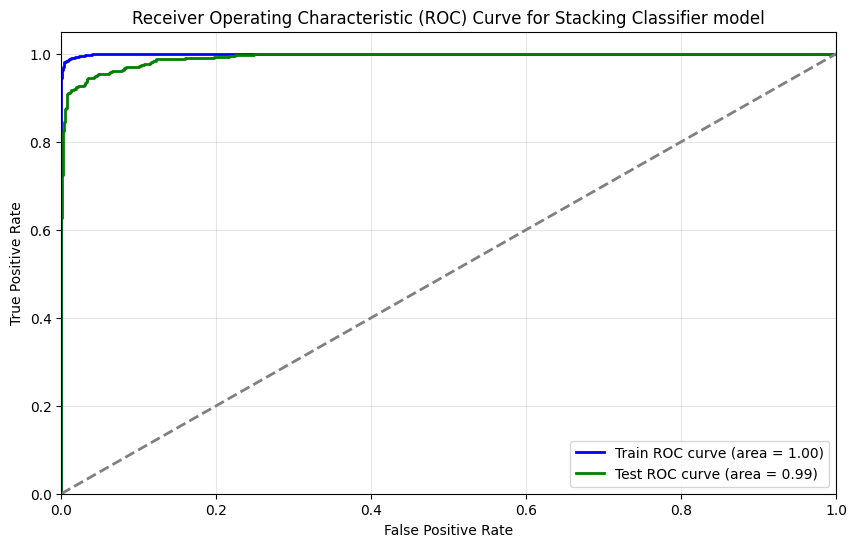

In [176]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators = 20, random_state = 1, min_samples_split = 2, min_samples_leaf = 20, max_depth = 4)),
    ('xg', XGBClassifier(n_estimators = 2, learning_rate = 0.001, random_state = 1, eval_metric = 'logloss')),
    ('svc', SVC(probability = True, C = 0.01, kernel = 'linear', random_state = 1, degree = 10)),
    ('cat', CatBoostClassifier(iterations = 1500, learning_rate = 0.01, depth = 8, eval_metric = 'AUC', random_seed = 1)),
    ('mlp', MLPClassifier(hidden_layer_sizes = (1000), activation = 'relu', solver = 'adam', learning_rate_init = 0.0001, max_iter = 400, random_state = 1))
]

stacking = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression(), cv = 5)
stacking.fit(x_train, y_train)

train_predictions = stacking.predict_proba(x_train)[:, 1]
test_predictions = stacking.predict_proba(x_test)[:, 1]

train_auc_stacking = roc_auc_score(y_train, train_predictions)
test_auc_stacking = roc_auc_score(y_test, test_predictions)

print(f"The ROC AUC score of Stacking Classifier (Train dataset): {train_auc_stacking}")
print(f"The ROC AUC score of Stacking Classifier (Test dataset): {test_auc_stacking}")

fpr_train, tpr_train, _ = roc_curve(y_train, train_predictions)
fpr_test, tpr_test, _ = roc_curve(y_test, test_predictions)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {train_auc_stacking:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {test_auc_stacking:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Stacking Classifier model')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

Stacking multiple algorithms together should work better than any algorithms used, but it didn't preform well and couldn't excelled the roc_auc score of CatBoost Classifier algorithm. So it is better for us to use CatBoost Classifier algorithm as final model.

In [182]:
#Seeing the confusion matrix for given dataset
print("Confusion matrix and classification report of the Stacking algorithm : ")
test_pred_labels = stacking.predict(x_test)

conf_matrix = confusion_matrix(y_test, test_pred_labels)

print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, test_pred_labels)
print("Classification Report:")
print(class_report)

Confusion matrix and classification report of the Stacking algorithm : 
Confusion Matrix:
[[969  33]
 [ 58 940]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1002
           1       0.97      0.94      0.95       998

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



The ROC AUC score of Stacked models (Train dataset): 0.9882509970627492
The ROC AUC score of Stacked models (Test dataset): 0.9544748178992717


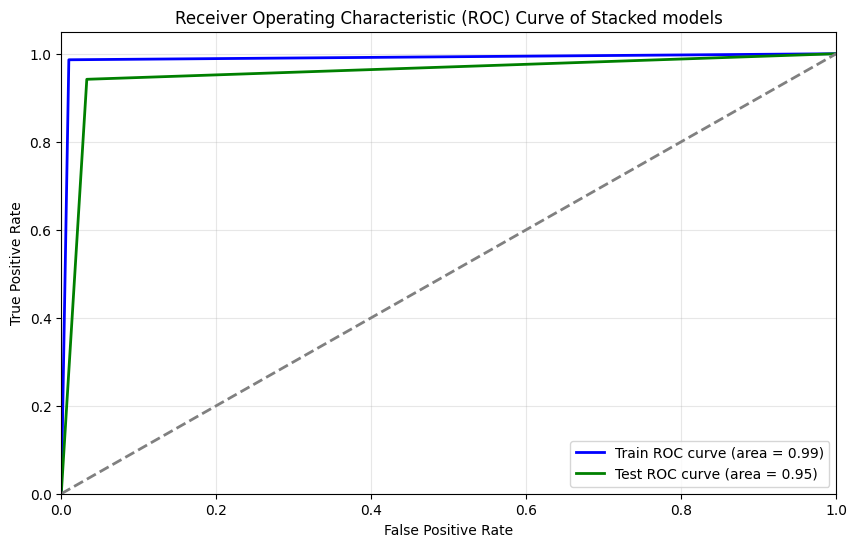

In [183]:
#Calculating roc_auc score with real predictions(not with probabilities)
#Evaluation of the model
train_predictions = stacking.predict(X = x_train)
test_predictions = stacking.predict(X = x_test)

train_auc_stck = roc_auc_score(y_train, train_predictions)
test_auc_stck = roc_auc_score(y_test, test_predictions)

print(f"The ROC AUC score of Stacked models (Train dataset): {train_auc_stck}")
print(f"The ROC AUC score of Stacked models (Test dataset): {test_auc_stck}")

#Drawing roc_auc line for seeing the models performance
fpr_train, tpr_train, _ = roc_curve(y_train, stacking.predict(x_train))
fpr_test, tpr_test, _ = roc_curve(y_test, stacking.predict(x_test))

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {roc_auc_score(y_train, stacking.predict(x_train)):.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {roc_auc_score(y_test, stacking.predict(x_test)):.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Stacked models')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

### Lastly, I am going to voting technique to see if it does better than stacked algorithms.

0:	total: 5.49ms	remaining: 8.23s
1:	total: 10.5ms	remaining: 7.88s
2:	total: 15.9ms	remaining: 7.93s
3:	total: 21.2ms	remaining: 7.91s
4:	total: 25.7ms	remaining: 7.67s
5:	total: 31.2ms	remaining: 7.78s
6:	total: 36.6ms	remaining: 7.8s
7:	total: 41.3ms	remaining: 7.71s
8:	total: 46.1ms	remaining: 7.64s
9:	total: 50.5ms	remaining: 7.52s
10:	total: 55.8ms	remaining: 7.55s
11:	total: 60.9ms	remaining: 7.55s
12:	total: 65.4ms	remaining: 7.48s
13:	total: 70ms	remaining: 7.43s
14:	total: 75.2ms	remaining: 7.44s
15:	total: 79.6ms	remaining: 7.38s
16:	total: 84.8ms	remaining: 7.4s
17:	total: 89.7ms	remaining: 7.38s
18:	total: 94.5ms	remaining: 7.37s
19:	total: 99.4ms	remaining: 7.36s
20:	total: 104ms	remaining: 7.32s
21:	total: 109ms	remaining: 7.3s
22:	total: 113ms	remaining: 7.28s
23:	total: 118ms	remaining: 7.23s
24:	total: 122ms	remaining: 7.21s
25:	total: 127ms	remaining: 7.22s
26:	total: 132ms	remaining: 7.18s
27:	total: 136ms	remaining: 7.16s
28:	total: 141ms	remaining: 7.17s
29:	total

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


The ROC AUC score of Voting Classifier (Train dataset): 0.9955041863760465
The ROC AUC score of Voting Classifier (Test dataset): 0.9867159468637875


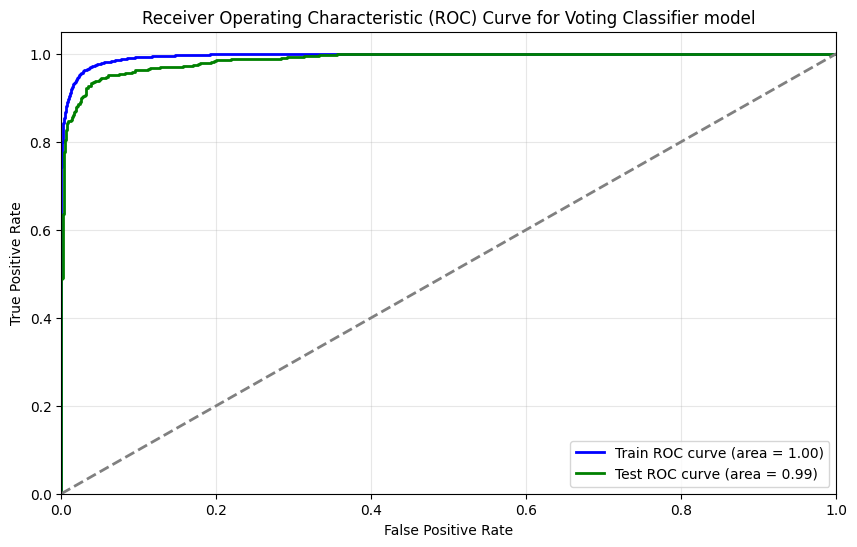

In [179]:
#Using Voting Classifier
voting = VotingClassifier(estimators = estimators, voting = 'soft')
voting.fit(x_train, y_train)

train_predictions = voting.predict_proba(x_train)[:, 1]
test_predictions = voting.predict_proba(x_test)[:, 1]

train_auc_voting = roc_auc_score(y_train, train_predictions)
test_auc_voting = roc_auc_score(y_test, test_predictions)

print(f"The ROC AUC score of Voting Classifier (Train dataset): {train_auc_voting}")
print(f"The ROC AUC score of Voting Classifier (Test dataset): {test_auc_voting}")

fpr_train, tpr_train, _ = roc_curve(y_train, train_predictions)
fpr_test, tpr_test, _ = roc_curve(y_test, test_predictions)

plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {train_auc_voting:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {test_auc_voting:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Voting Classifier model')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

Well, it seems like voting techniques doesn't affected to the performance of CatBoostClassifier and just returned lower roc_auc score.

In [180]:
#Seeing the confusion matrix for given dataset
print("Confusion matrix and classification report of the Voting classifier algorithm : ")
test_pred_labels = voting.predict(x_test)

conf_matrix = confusion_matrix(y_test, test_pred_labels)

print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, test_pred_labels)
print("Classification Report:")
print(class_report)

Confusion matrix and classification report of the Voting classifier algorithm : 
Confusion Matrix:
[[961  41]
 [ 66 932]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1002
           1       0.96      0.93      0.95       998

    accuracy                           0.95      2000
   macro avg       0.95      0.95      0.95      2000
weighted avg       0.95      0.95      0.95      2000



The ROC AUC score of Voting Classifier (Train dataset): 0.9658774289693574
The ROC AUC score of Voting Classifier (Test dataset): 0.9464747858991437


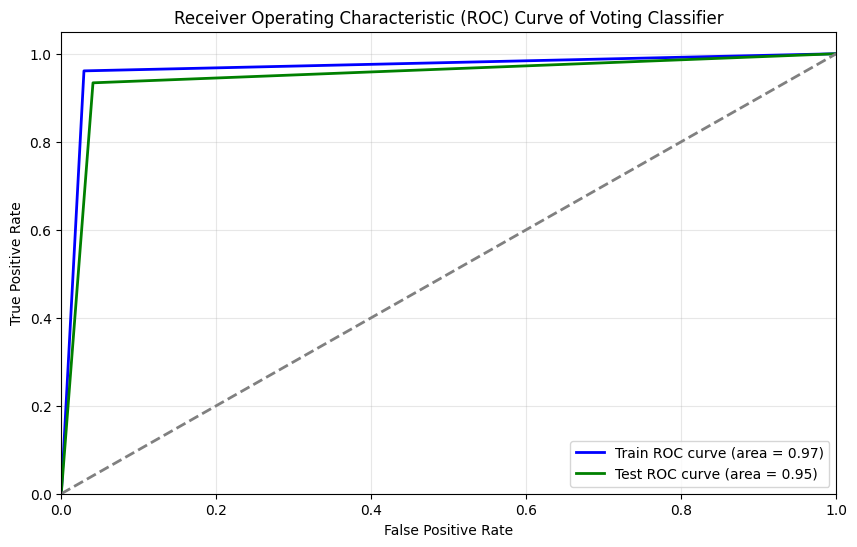

In [181]:
#Calculating roc_auc score with real predictions(not with probabilities)
#Evaluation of the model
train_predictions = voting.predict(X = x_train)
test_predictions = voting.predict(X = x_test)

train_auc_vote = roc_auc_score(y_train, train_predictions)
test_auc_vote = roc_auc_score(y_test, test_predictions)

print(f"The ROC AUC score of Voting Classifier (Train dataset): {train_auc_vote}")
print(f"The ROC AUC score of Voting Classifier (Test dataset): {test_auc_vote}")

#Drawing roc_auc line for seeing the models performance
fpr_train, tpr_train, _ = roc_curve(y_train, voting.predict(x_train))
fpr_test, tpr_test, _ = roc_curve(y_test, voting.predict(x_test))

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label=f'Train ROC curve (area = {roc_auc_score(y_train, voting.predict(x_train)):.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test ROC curve (area = {roc_auc_score(y_test, voting.predict(x_test)):.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve of Voting Classifier')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

Final conclusion : In this jupyter notebook, I have tested numerous classification models and verified special metrics of the models performance on both training and test datasets. Among them, CatBoost Classifier algorithm and MLP classifier algorithms returned outstanding roc_auc scores. Moreover I have tried to integrate multiple model with the hope to increase the overall performance of the model. Neverthless, the roc_auc score of the model didn't surge. That is why I am going to train CatBoostClassifier model with entire train data and test its performance on the test set. All the codes for training and preserving the model is saved in the folder pipeline.

For creating pipeline, I am going to use imputed dataset in order to avoid adding multiple unnecessary steps to my pipeline.